In [1]:
import pandas as pd


signals_df = pd.read_csv("/home/ruilin/Downloads/LaIn10_Orig_Delta_Theta", header=None, names=['Signal1', 'Signal2', 'Signal3'])

signals_df.head()


,Signal1,Signal2,Signal3
0,0.93045,8.942100e-07,2.501200e-08
1,0.13292,1.033400e-06,3.573200e-09
2,-9.17160,-7.767900e-06,-2.714400e-07
3,-8.63990,-1.617100e-05,-2.854700e-07
4,-3.05720,-1.931500e-05,8.184000e-08


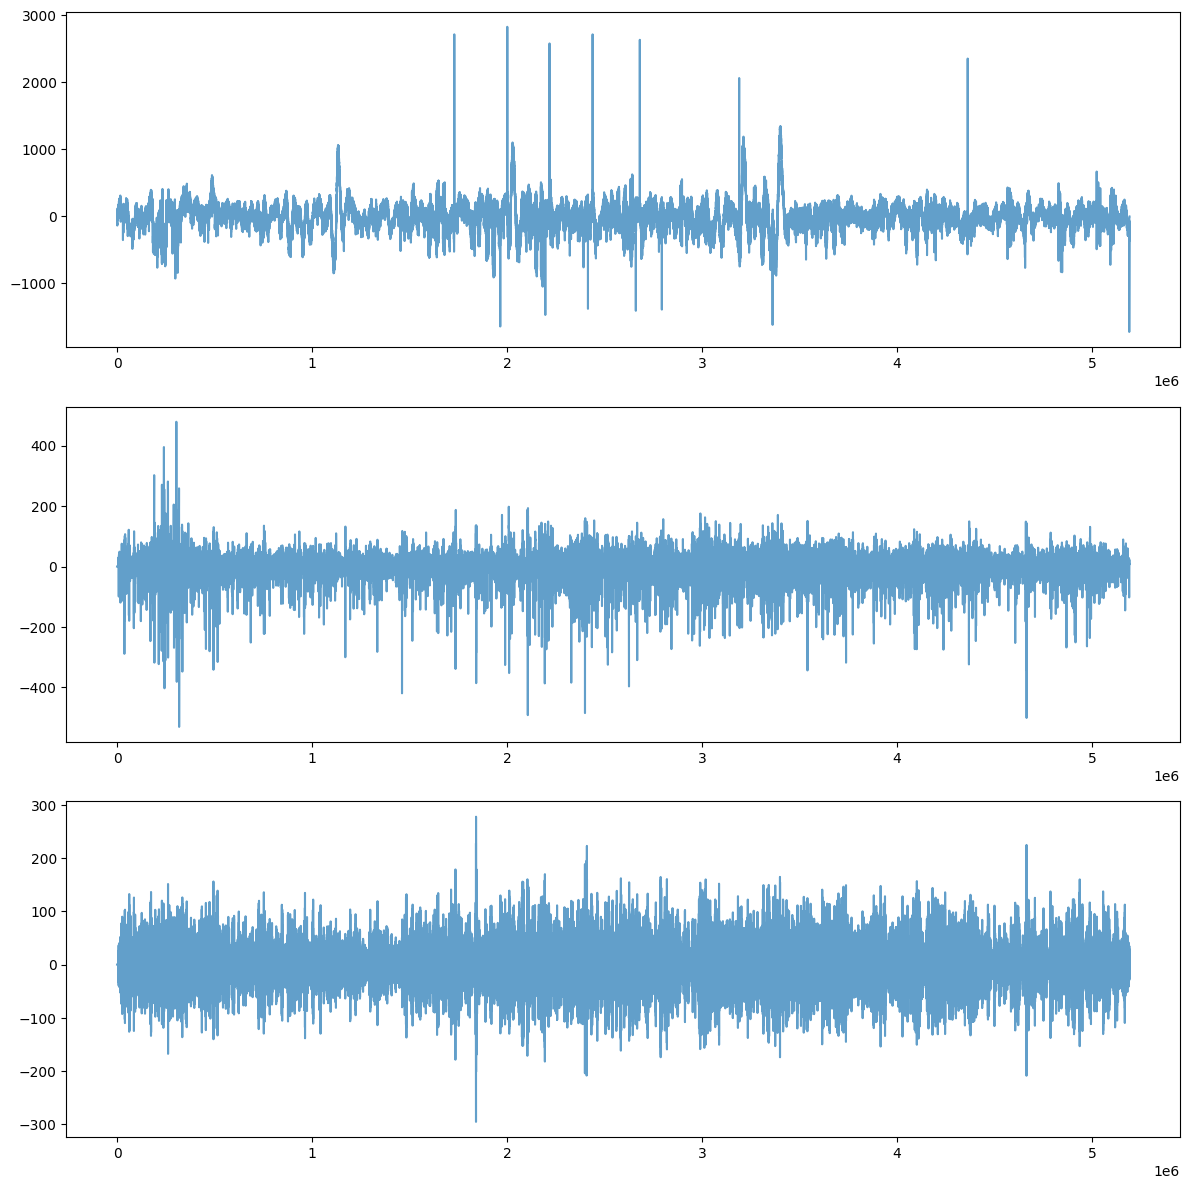

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(signals_df['Signal1'], label='LaIn10', alpha=0.7)
plt.subplot(3, 1, 2)
plt.plot(signals_df['Signal2'], label='LaIn10_Delta', alpha=0.7)
plt.subplot(3, 1, 3)
plt.plot(signals_df['Signal3'], label='LaIn10_Theta', alpha=0.7)
plt.tight_layout()
plt.show()

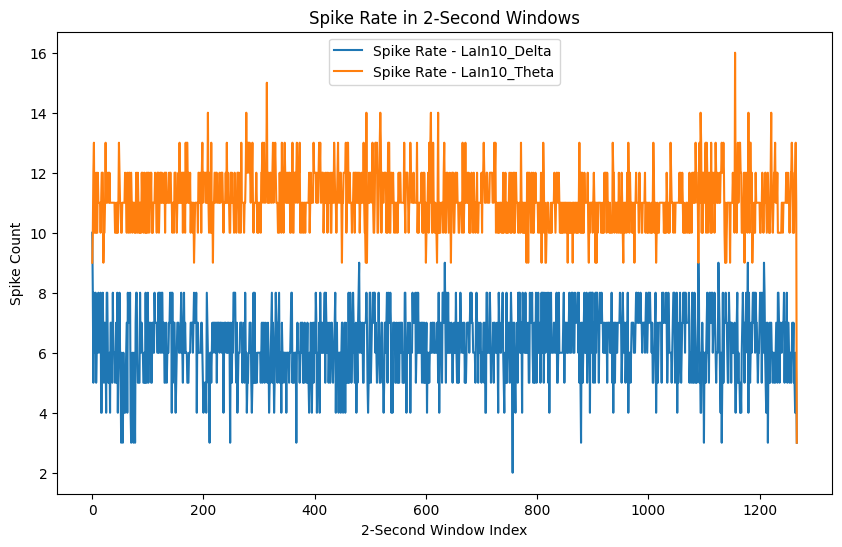

In [10]:
from scipy.signal import find_peaks

def count_spikes(signal, window_size):
    spike_counts = []
    for start in range(0, len(signal), window_size):
        window = signal[start:start + window_size]
        peaks, _ = find_peaks(window)
        spike_counts.append(len(peaks))
    return spike_counts

spike_rate_signal1 = count_spikes(signals_df['Signal1'], 4096)
spike_rate_signal2 = count_spikes(signals_df['Signal2'], 4096)
spike_rate_signal3 = count_spikes(signals_df['Signal3'], 4096)

plt.figure(figsize=(10, 6))
# plt.plot(spike_rate_signal1, label='Spike Rate - LaIn10')
plt.plot(spike_rate_signal2, label='Spike Rate - LaIn10_Delta')
plt.plot(spike_rate_signal3, label='Spike Rate - LaIn10_Theta')
plt.title('Spike Rate in 2-Second Windows')
plt.xlabel('2-Second Window Index')
plt.ylabel('Spike Count')
plt.legend()
plt.show()

In [14]:
import matplotlib.pyplot as plt
import mne

file_path = 'sub-150_ses-001_task-stim_run-01_ieeg_edited_GVE_filtered5.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
# raw.plot() 

Extracting EDF parameters from /home/ruilin/Desktop/ECE9063/Final/sub-150_ses-001_task-stim_run-01_ieeg_edited_GVE_filtered5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5191167  =      0.000 ...  2534.750 secs...


/tmp/ipykernel_259208/72774617.py:5: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)


In [22]:
import numpy as np
data, times = raw[:]
signal4 = data[4]
sfreq = raw.info['sfreq']
window_size = int(2 * sfreq)
peak_counts_C131 = []

for start in range(0, len(signal4), window_size):
    window = signal4[start:start + window_size]
    peaks, _ = find_peaks(window, height=0.0001, distance=10) 
    peak_counts_C131.append(len(peaks))
# print(peak_counts)

peak_counts_df = pd.DataFrame({
    'LaIn10': spike_rate_signal1,
    'LaIn10_Delta': spike_rate_signal2,
    'LaIn10_Theta': spike_rate_signal3,
    'C131': peak_counts_C131
})

correlation_matrix = peak_counts_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                LaIn10  LaIn10_Delta  LaIn10_Theta      C131
LaIn10        1.000000      0.035435      0.008720  0.225702
LaIn10_Delta  0.035435      1.000000     -0.143011 -0.025201
LaIn10_Theta  0.008720     -0.143011      1.000000  0.019862
C131          0.225702     -0.025201      0.019862  1.000000


In [24]:
variances = []
for start in range(0, len(signal4), window_size):
    window = signal4[start:start + window_size]
    window_variance = np.var(window)
    variances.append(window_variance)


peak_counts_df2 = pd.DataFrame({
    'LaIn10': spike_rate_signal1,
    'LaIn10_Delta': spike_rate_signal2,
    'LaIn10_Theta': spike_rate_signal3,
    'C131_Var': variances
})

correlation_matrix = peak_counts_df2.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                LaIn10  LaIn10_Delta  LaIn10_Theta  C131_Var
LaIn10        1.000000      0.035435      0.008720  0.037055
LaIn10_Delta  0.035435      1.000000     -0.143011 -0.058163
LaIn10_Theta  0.008720     -0.143011      1.000000  0.008517
C131_Var      0.037055     -0.058163      0.008517  1.000000
